# Project: Investigate a Dataset as a part of Nano Degree Program

## Table of Contents
<ul>
<li><a href="#intro">Introduction And Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction And Questions

### Introduction


### Questions

<ul>
<li>What genre of movies are got popularity year to year?</li>
<li>What kind of properties made movies earn highest revenues?</li>
<li>Budget vs Revenue (Moving Average)</li>
<li>What is the yearly revenue change</li>
</ul>

In [1]:
# Necessay Libraries are included
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [2]:
# load TMdb Movie data in data frame
df_tmdb = pd.read_csv("tmdb-movies.csv")
df_tmdb.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [3]:
# Find shape(row, col) of the data set
df_tmdb.shape

(10866, 21)

In [13]:
# Overall information of the data type and presence and missing of value of column 
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df_tmdb.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
# Summary of Statistical presence of data over the columns that have numerial data type. 
df_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning (Replace this with more specific notes!)
> Cleaning means formating data what ever its content and content type. Formating null, special character.

In [7]:
# The output(in above) of functions shows that there are few columns of missing rows or values. Now fill null with
# emplty string 
df_tmdb.genres.fillna('', inplace=True)

In [8]:
df_tmdb.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                     0
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
df_tmdb.cast.fillna('', inplace=True)

In [10]:
def explode_string(data):
    return data.split('|')

In [11]:
df_tmdb.genres = df_tmdb.genres.apply(explode_string)

<a id='eda'></a>
## Exploratory Data Analysis

### 1. What genre of movies are got popularity year to year?

In [12]:
# The popularity of movies can be found by the popularity or vote average column. The statistical summary shows that 75% movies
# has popularty bellow 0.713817 and vote average bellow 6.6. So, I have thought only take the movies that popularity has > 0.75

popu= 0.7

def movies_based_on_popularity(movies):
    return movies[movies['popularity'] > popu]
    #if(mov>popu):
     #   print('OK')
    


In [84]:
#movies_based_on_popularity(0.8)

In [13]:
df_popular = df_tmdb.groupby('release_year').apply(movies_based_on_popularity)
df_popular.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,2785.000000,2785.000000,2.785000e+03,2.785000e+03,2785.000000,2785.000000,2785.000000,2785.000000,2.785000e+03,2.785000e+03
mean,56469.313106,1.633585,4.014430e+07,1.307887e+08,108.177020,698.263914,6.274542,2003.182047,4.596822e+07,1.619928e+08
std,86611.383400,1.582318,4.705474e+07,1.995050e+08,23.864859,969.296286,0.791243,11.174117,4.979693e+07,2.429294e+08
min,5.000000,0.700187,0.000000e+00,0.000000e+00,0.000000,10.000000,3.300000,1960.000000,0.000000e+00,0.000000e+00
25%,4257.000000,0.887576,6.000000e+06,1.008937e+07,95.000000,168.000000,5.800000,1998.000000,8.289819e+06,1.223033e+07
50%,11324.000000,1.158663,2.500000e+07,6.332720e+07,105.000000,354.000000,6.300000,2006.000000,3.040749e+07,7.879922e+07
75%,68812.000000,1.786913,5.600000e+07,1.632143e+08,119.000000,794.000000,6.800000,2012.000000,6.724590e+07,2.057296e+08
max,417859.000000,32.985763,3.800000e+08,2.781506e+09,540.000000,9767.000000,8.400000,2015.000000,3.683713e+08,2.827124e+09


In [14]:
df_popular.genres

release_year       
1960          10141       [Drama, Horror, Thriller]
              10142    [Action, Adventure, Western]
              10143        [Action, Drama, History]
              10144        [Comedy, Drama, Romance]
              10145               [Comedy, Romance]
                                   ...             
2015          199                          [Horror]
              200                  [Romance, Drama]
              201                 [Romance, Comedy]
              317      [Animation, Family, Fantasy]
              492                           [Drama]
Name: genres, Length: 2785, dtype: object

In [15]:
def movies_genres_year(movies):
    """
        This function takes a Data Frame having and returns a dictionary having
        release_year as key and value a dictionary having key as movie's genre
        and value as frequency of the genre that year.
    """
    movies_in_year_by_genre = {} # declare of dictionary
    for (release_year,pos), genres in movies.items():
        for genre in genres:
            if release_year in movies_in_year_by_genre:  #check year is exist
                if genre in movies_in_year_by_genre[release_year]: # check  genre is exist
                    movies_in_year_by_genre[release_year][genre] += 1 # increment genre if it is exist
                else:
                    movies_in_year_by_genre[release_year][genre] = 1  # new genre entry 
            else:
                movies_in_year_by_genre[release_year] = {} # declare dictionary within dictionary
                movies_in_year_by_genre[release_year][genre] = 1 # new genre and year entry
                
    return movies_in_year_by_genre

In [16]:
popular_movies = movies_genres_year(df_popular.genres)
popular_movies

{1960: {'Drama': 3,
  'Horror': 1,
  'Thriller': 2,
  'Action': 2,
  'Adventure': 2,
  'Western': 1,
  'History': 1,
  'Comedy': 2,
  'Romance': 3,
  'Fantasy': 1,
  'Science Fiction': 1},
 1961: {'Adventure': 2,
  'Animation': 1,
  'Comedy': 3,
  'Family': 1,
  'Drama': 4,
  'Romance': 1,
  'Music': 1,
  'Crime': 2,
  'Action': 1,
  'War': 1,
  'Mystery': 1},
 1962: {'Adventure': 2,
  'Action': 1,
  'Thriller': 1,
  'Drama': 3,
  'History': 1,
  'War': 1,
  'Romance': 1,
  'Crime': 1},
 1963: {'Action': 2,
  'Thriller': 2,
  'Adventure': 2,
  'Animation': 1,
  'Family': 1,
  'Horror': 1,
  'Comedy': 4,
  'Mystery': 1,
  'Romance': 2,
  'Drama': 1,
  'History': 1,
  'Crime': 2},
 1964: {'Adventure': 1,
  'Action': 1,
  'Thriller': 1,
  'Drama': 1,
  'Comedy': 3,
  'War': 1,
  'Music': 2,
  'Family': 1,
  'Fantasy': 1},
 1965: {'Adventure': 1,
  'Action': 1,
  'Thriller': 1,
  'Drama': 2,
  'Family': 1,
  'Music': 1,
  'Romance': 2,
  'War': 1},
 1966: {'Animation': 1,
  'Family': 1,
  

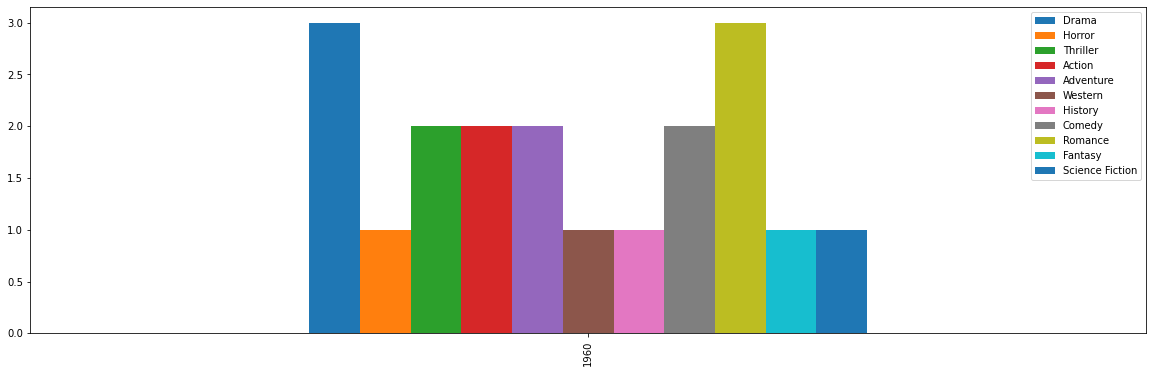

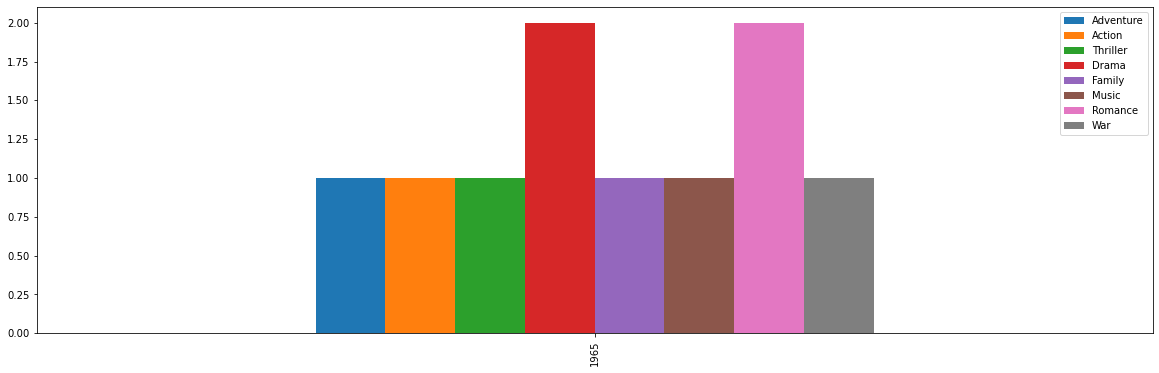

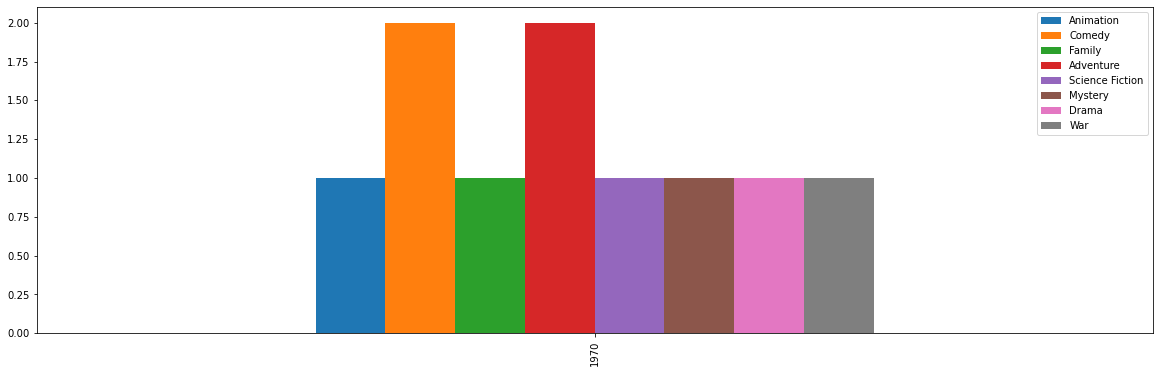

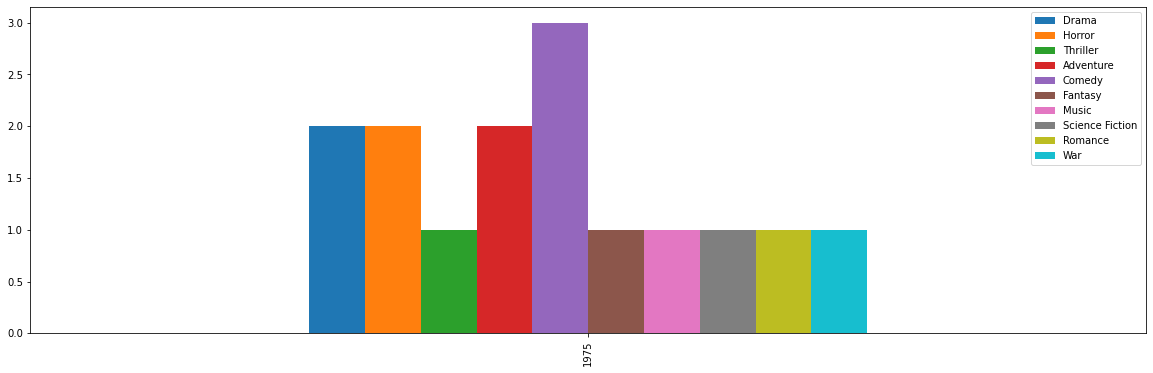

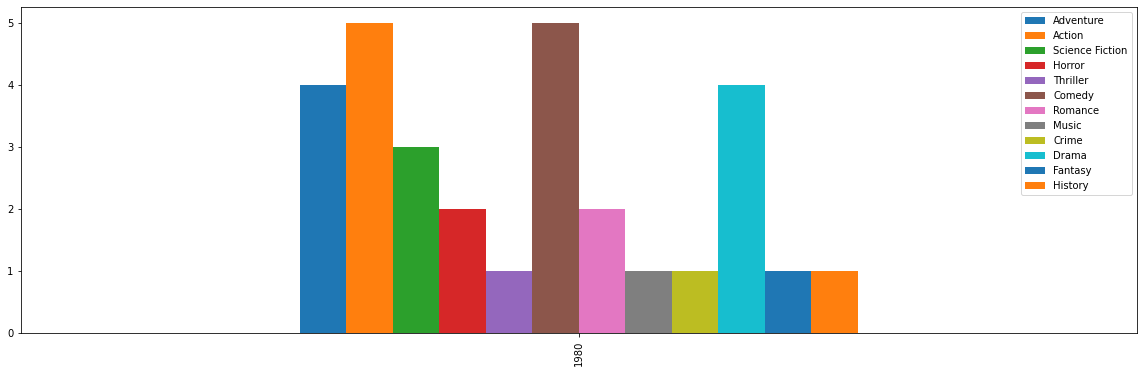

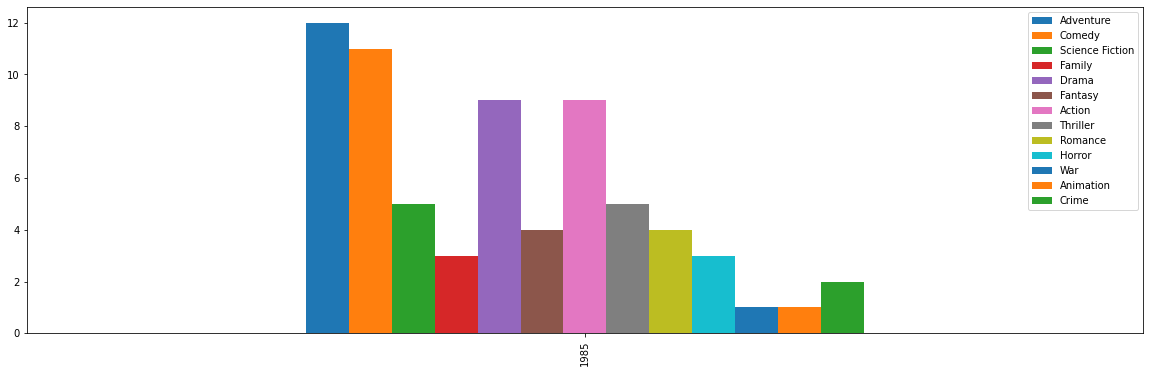

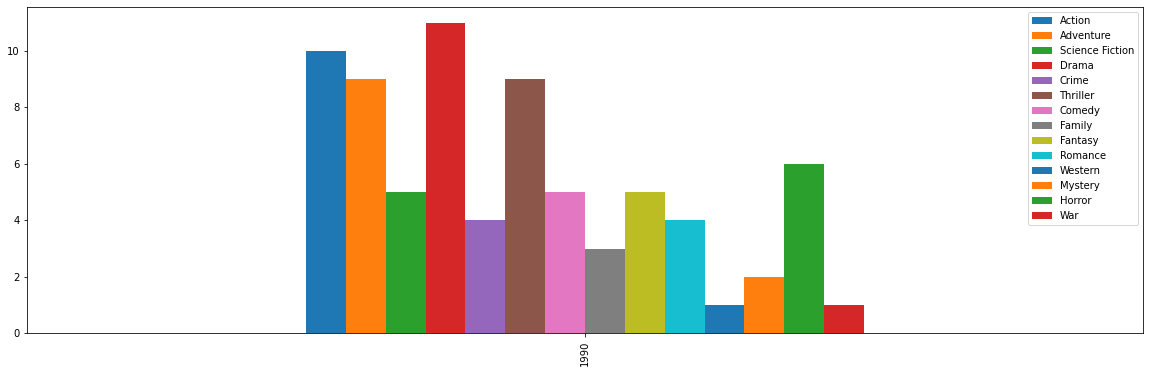

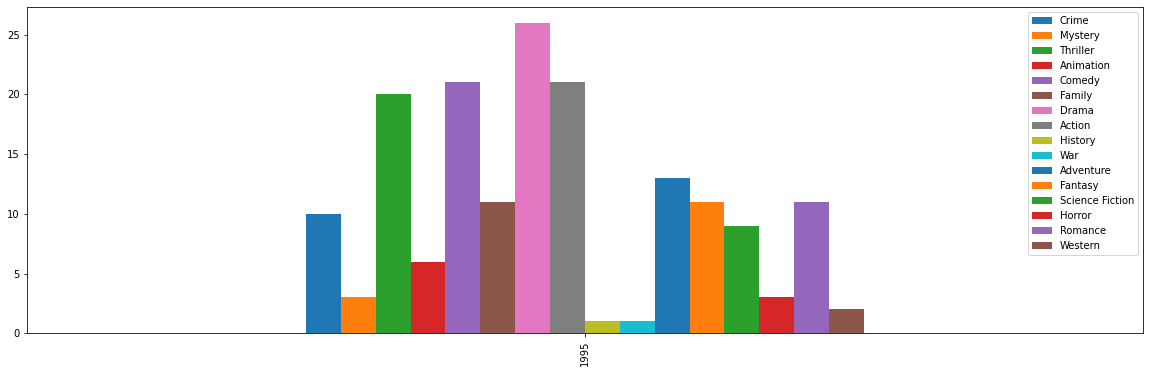

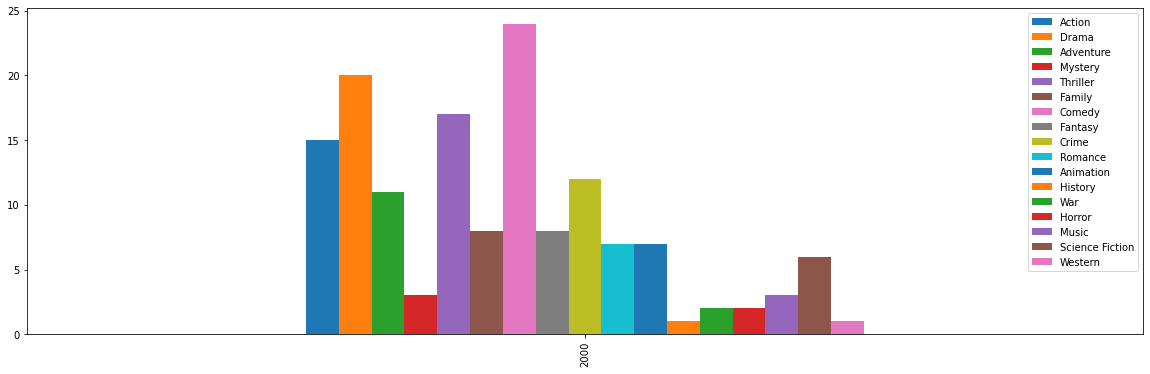

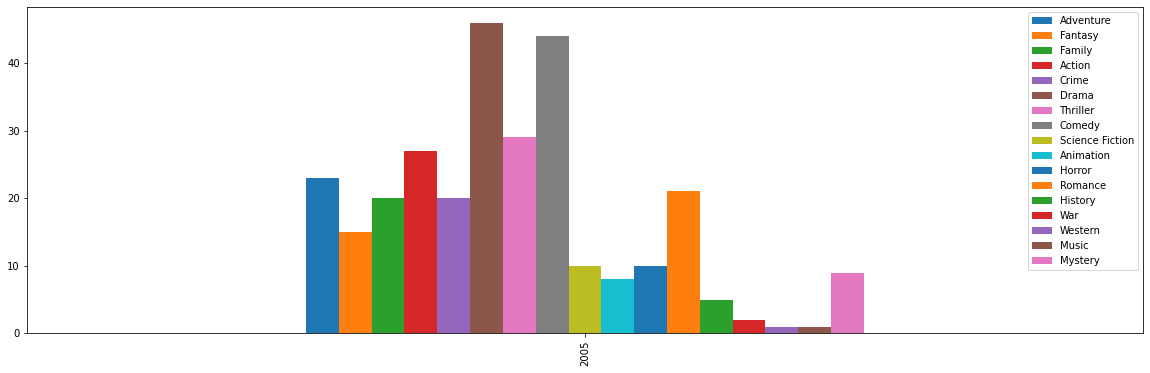

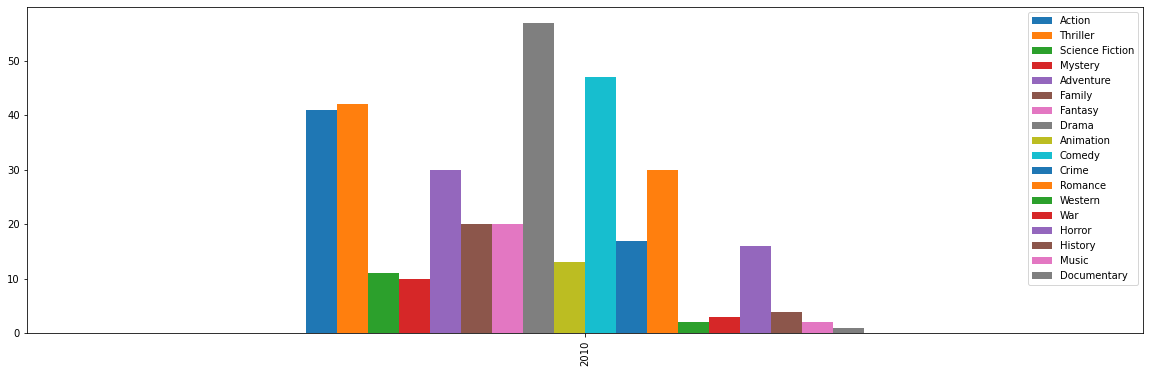

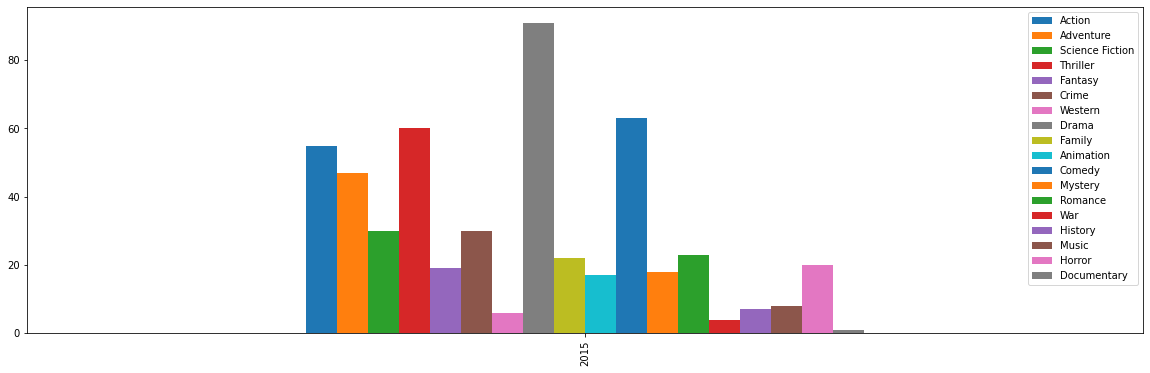

In [17]:
# draw graph of every five years
for year,genre_dic in popular_movies.items():
    if year%5 == 0:
        pd.DataFrame(popular_movies[year], index=[year]).plot(kind='bar', figsize=(20, 6))

### 2. What kind of properties made movies earn highest revenues?
> The statistical summary shows that mean of adjustable revenue is 1.6 billion. I am considering highest revenue earned movies 
> are those have adhustable revenue >= 1600000000. 
> The output of data frame 'higest_earned_movies' shows that the highest earned revenuw movies have few significant properties
> those are given bellow
> 1. The value of 'popularity' column is greater than Q3 quartile. This is the signature of earning huge amount.
> 2. Vote is one of the most countable action to understand a product's quality. And quality begs earning in normal sense.
> Hence, both columns 'vote_count' and 'vote_averate' contain value higher than Q3 quartile
> 3. Movie genre plays an important role to make the big shot. 5 out of 7 movies are in Adventure genre. 3s are in Action.

In [18]:
higest_earned_movies = df_tmdb[df_tmdb['revenue_adj']>=1600000000].sort_values(by='revenue_adj',ascending=False)
higest_earned_movies.shape

(7, 21)

In [19]:
higest_earned_movies

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,"[Action, Adventure, Fantasy, Science Fiction]",Ingenious Film Partners|Twentieth Century Fox ...,12/10/2009,8458,7.1,2009,2.408869e+08,2.827124e+09
1329,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",...,Princess Leia is captured and held hostage by ...,121,"[Adventure, Action, Science Fiction]",Lucasfilm|Twentieth Century Fox Film Corporation,3/20/1977,4428,7.9,1977,3.957559e+07,2.789712e+09
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,"84 years later, a 101-year-old woman named Ros...",194,"[Drama, Romance, Thriller]",Paramount Pictures|Twentieth Century Fox Film ...,11/18/1997,4654,7.3,1997,2.716921e+08,2.506406e+09
10594,9552,tt0070047,2.010733,8000000,441306145,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,http://theexorcist.warnerbros.com/,William Friedkin,Something almost beyond comprehension is happe...,...,12-year-old Regan MacNeil begins to adapt an e...,122,"[Drama, Horror, Thriller]",Warner Bros.|Hoya Productions,12/26/1973,1113,7.2,1973,3.928928e+07,2.167325e+09
9806,578,tt0073195,2.563191,7000000,470654000,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,http://www.jaws25.com/,Steven Spielberg,Don't go in the water.,...,An insatiable great white shark terrorizes the...,124,"[Horror, Thriller, Adventure]",Universal Pictures|Zanuck/Brown Productions,6/18/1975,1415,7.3,1975,2.836275e+07,1.907006e+09
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
8889,601,tt0083866,2.900556,10500000,792910554,E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,http://www.et20.com/,Steven Spielberg,He is afraid. He is alone. He is three million...,...,A science fiction fairytale about an extra-ter...,115,"[Science Fiction, Adventure, Family, Fantasy]",Universal Pictures|Amblin Entertainment,4/3/1982,1830,7.2,1982,2.372625e+07,1.791694e+09


### 2.1 Popularity 

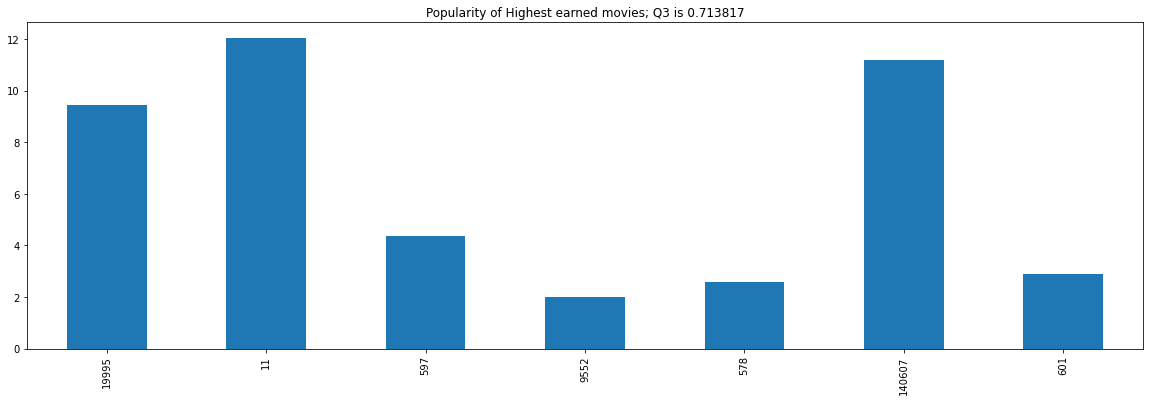

In [20]:
pd.DataFrame(list(higest_earned_movies.popularity), index=list(higest_earned_movies.id)).plot(kind='bar',
title='Popularity of Highest earned movies; Q3 is 0.713817',legend= False,figsize=(20, 6))
plt.show()

### 2.2 Vote Count and Vote average

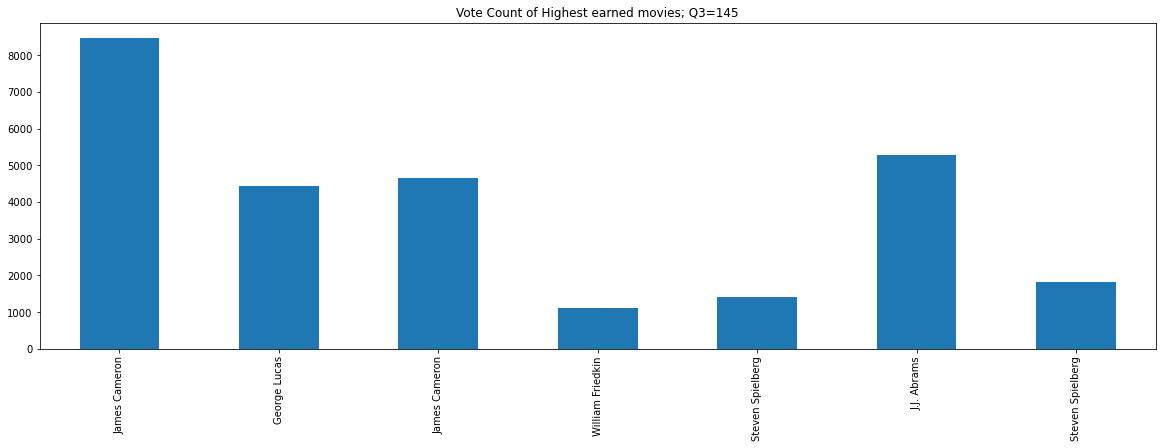

In [25]:
pd.DataFrame(list(higest_earned_movies.vote_count), index=list(higest_earned_movies.director)).plot(kind='bar',
title='Vote Count of Highest earned movies; Q3=145',legend= False,figsize=(20, 6))
plt.show()

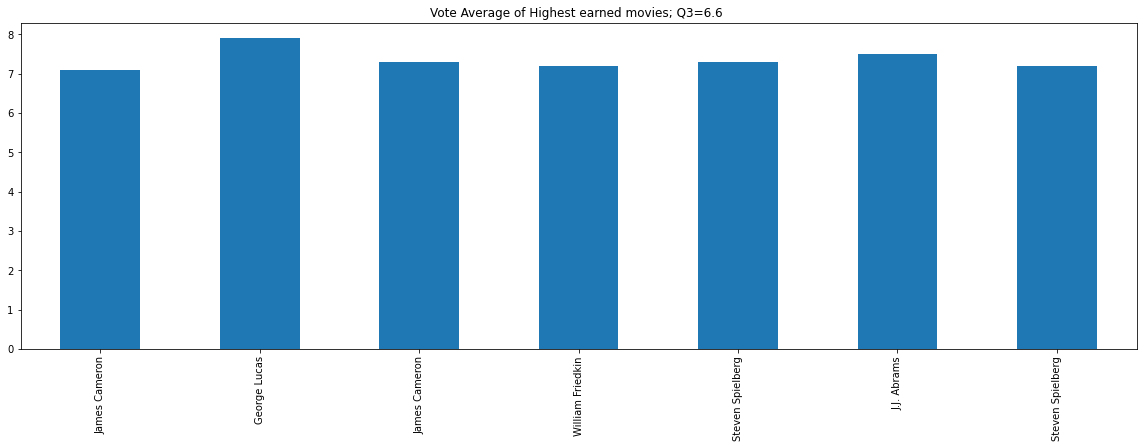

In [24]:
pd.DataFrame(list(higest_earned_movies.vote_average), index=list(higest_earned_movies.director)).plot(kind='bar',
title='Vote Average of Highest earned movies; Q3=6.6 ',legend= False,figsize=(20, 6))
plt.show()

### 2.3 Movie Genres

In [26]:
def movies_highest_genre_count(data):
    """
        This function takes a Data Frame having and returns a dictionary having
        release_year as key and value a dictionary having key as movie's genre
        and value as frequency of the genre that year.
    """
    movies_highest_by_genre = {} # declare of dictionary
    for genres in data:
        for genre in genres:
            if genre in movies_highest_by_genre:  #check genre is exist
                movies_highest_by_genre[genre] += 1 # increment genre if it is exist
            else:
                movies_highest_by_genre[genre] = 1  # new genre entry 
           
                
    return movies_highest_by_genre

In [27]:
highest_revenue_genres = movies_highest_genre_count(higest_earned_movies.genres)
highest_revenue_genres

{'Action': 3,
 'Adventure': 5,
 'Fantasy': 3,
 'Science Fiction': 4,
 'Drama': 2,
 'Romance': 1,
 'Thriller': 3,
 'Horror': 2,
 'Family': 1}

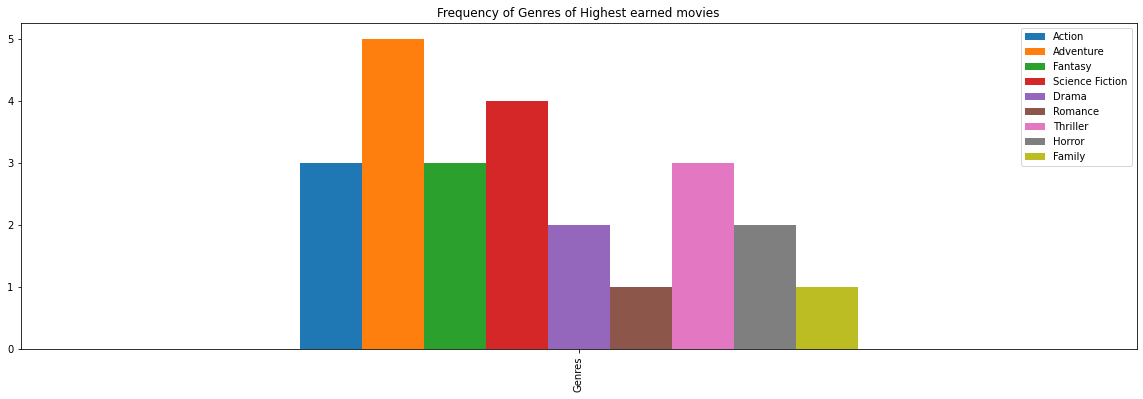

In [28]:
pd.DataFrame(highest_revenue_genres, index=['Genres']).plot(kind='bar',
title='Frequency of Genres of Highest earned movies',figsize=(20, 6))
plt.show()

### 3 Budget vs Revenue (Moving Average)

In [112]:
# create dataframe contains only revenue adj >0
df_revenue = df_tmdb[df_tmdb.revenue_adj > 0].sort_values(by='release_year',ascending=True)
index_list = list(range(0, df_revenue.shape[0]))
#df_revenue.
df_revenue.index = index_list
df_revenue.head(50)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,18973,tt0053716,0.055821,3000000,7100000,Cinderfella,Jerry Lewis|Ed Wynn|Judith Anderson|Henry Silv...,NaN,Frank Tashlin,NaN,...,This was Jerry Lewis' answer to the classic Ci...,91,"[Comedy, Romance]",Paramount Pictures|Jerry Lewis Productions,12/18/1960,13,7.2,1960,2.211890e+07,5.234807e+07
1,539,tt0054215,2.610362,806948,32000000,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,NaN,Alfred Hitchcock,The master of suspense moves his cameras into ...,...,When larcenous real estate clerk Marion Crane ...,109,"[Drama, Horror, Thriller]",Shamley Productions,8/14/1960,1180,8.0,1960,5.949601e+06,2.359350e+08
2,966,tt0054047,1.872132,2000000,4905000,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,NaN,John Sturges,They were seven - And they fought like seven h...,...,An oppressed Mexican peasant village hires sev...,128,"[Action, Adventure, Western]",The Mirisch Corporation|Alpha Productions,10/23/1960,224,7.0,1960,1.474593e+07,3.616441e+07
3,967,tt0054331,1.136943,12000000,60000000,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,NaN,Stanley Kubrick,More titanic than any story ever told!,...,Spartacus is a 1960 American historical drama ...,197,"[Action, Drama, History]",Bryna Productions,10/6/1960,211,6.9,1960,8.847561e+07,4.423780e+08
4,284,tt0053604,0.947307,3000000,25000000,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,NaN,Billy Wilder,"Movie-wise, there has never been anything like...",...,Bud Baxter is a minor clerk in a huge New York...,125,"[Comedy, Drama, Romance]",United Artists|The Mirisch Company,6/15/1960,235,7.9,1960,2.211890e+07,1.843242e+08
5,25767,tt0053877,0.390240,0,6000000,The Grass Is Greener,Cary Grant|Deborah Kerr|Robert Mitchum|Jean Si...,NaN,Stanley Donen,Ever See a Four-Sided Triangle?,...,Victor and Hillary are down on their luck to t...,104,"[Comedy, Drama, Romance]",Grandon Productions,12/23/1960,12,4.9,1960,0.000000e+00,4.423780e+07
6,15788,tt0053644,0.114188,0,10000000,The Bellboy,Jerry Lewis|Alex Gerry|Bob Clayton|Sonnie Sand...,NaN,Jerry Lewis,It's a Series of Silly Sequences and One of Je...,...,Stanley is a bellboy at the Fountainbleau Hote...,72,"[Comedy, Family]",Paramount Pictures|Jerry Lewis Productions,7/20/1960,12,7.0,1960,0.000000e+00,7.372967e+07
7,12230,tt0055254,2.631987,4000000,215880014,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,NaN,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,The Canine Caper of the Century,...,When a litter of dalmatian puppies are abducte...,79,"[Adventure, Animation, Comedy, Family]",Walt Disney Productions,1/25/1961,913,6.6,1961,2.917944e+07,1.574815e+09
8,164,tt0054698,1.752027,2500000,9500000,Breakfast at Tiffany's,Audrey Hepburn|George Peppard|Patricia Neal|Bu...,NaN,Blake Edwards,"Audrey Hepburn plays that daring, darling Holl...",...,Fortune hunter Holly Golightly finds herself c...,110,"[Comedy, Drama, Romance]",Jurow-Shepherd,10/5/1961,557,7.4,1961,1.823715e+07,6.930118e+07
9,1725,tt0055614,0.900245,6000000,43656822,West Side Story,Natalie Wood|Richard Beymer|Russ Tamblyn|Rita ...,NaN,Jerome Robbins|Robert Wise,The screen achieves one of the great entertain...,...,In the slums of the upper West Side of Manhatt...,152,"[Music, Crime, Drama]",United Artists|20th Century Fox Home Entertain...,10/18/1961,192,6.6,1961,4.376917e+07,3.184705e+08


In [139]:
ma_df_revenue=[]
ma_df_revenue_year=[]
t_revenue = 0

for i in range(df_revenue.shape[0]-31):
    for j in range(31):
        t_revenue += df_revenue['revenue_adj'][i+j] 
    
    ma_df_revenue.append(round(t_revenue/30,2))
    ma_df_revenue_year.append(df_revenue['release_year'][i+30])

len(ma_df_revenue_year)

4819

In [140]:
# create dataframe contains only budget adj >0
df_budget = df_tmdb[df_tmdb.budget_adj > 0].sort_values(by='release_year',ascending=True)
index_list = list(range(0, df_budget.shape[0])) # same size to revenue
df_budget.index = index_list

In [141]:
ma_df_budget =[]
t_budget  = 0

for i in range(df_revenue.shape[0]-31):
    for j in range(30):
        t_budget += df_budget['revenue_adj'][i+j] 
    
    ma_df_budget.append(round(t_budget/30,2))
    

len(ma_df_budget)

4819

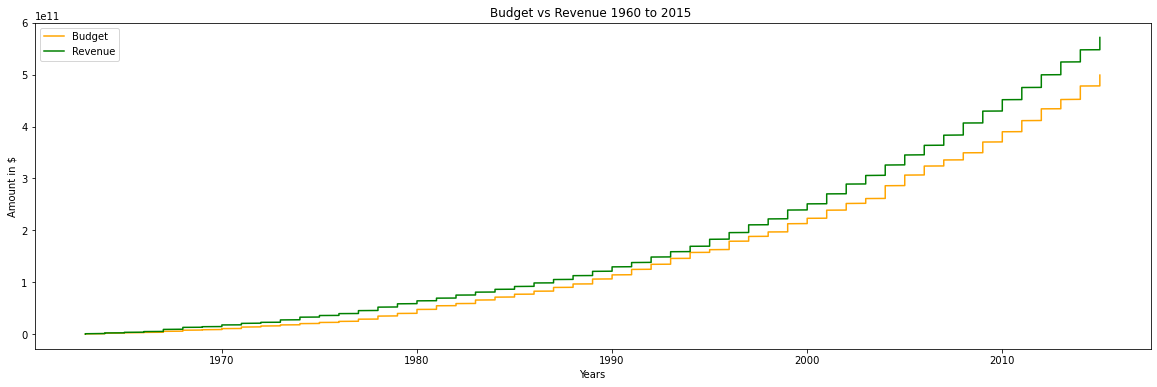

In [142]:
plt.figure(figsize=(20,6))
plt.plot(ma_df_revenue_year,ma_df_budget,color='orange')
plt.plot(ma_df_revenue_year,ma_df_revenue,color='green')
plt.xlabel('Years')
plt.ylabel('Amount in $')
plt.title('Budget vs Revenue 1960 to 2015 ')
plt.legend(['Budget','Revenue'])
plt.show()

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!